# Datasets
During the campaigns several datasets have been collected. The overview below shows the datasets available via the intake catalog for each research flight.

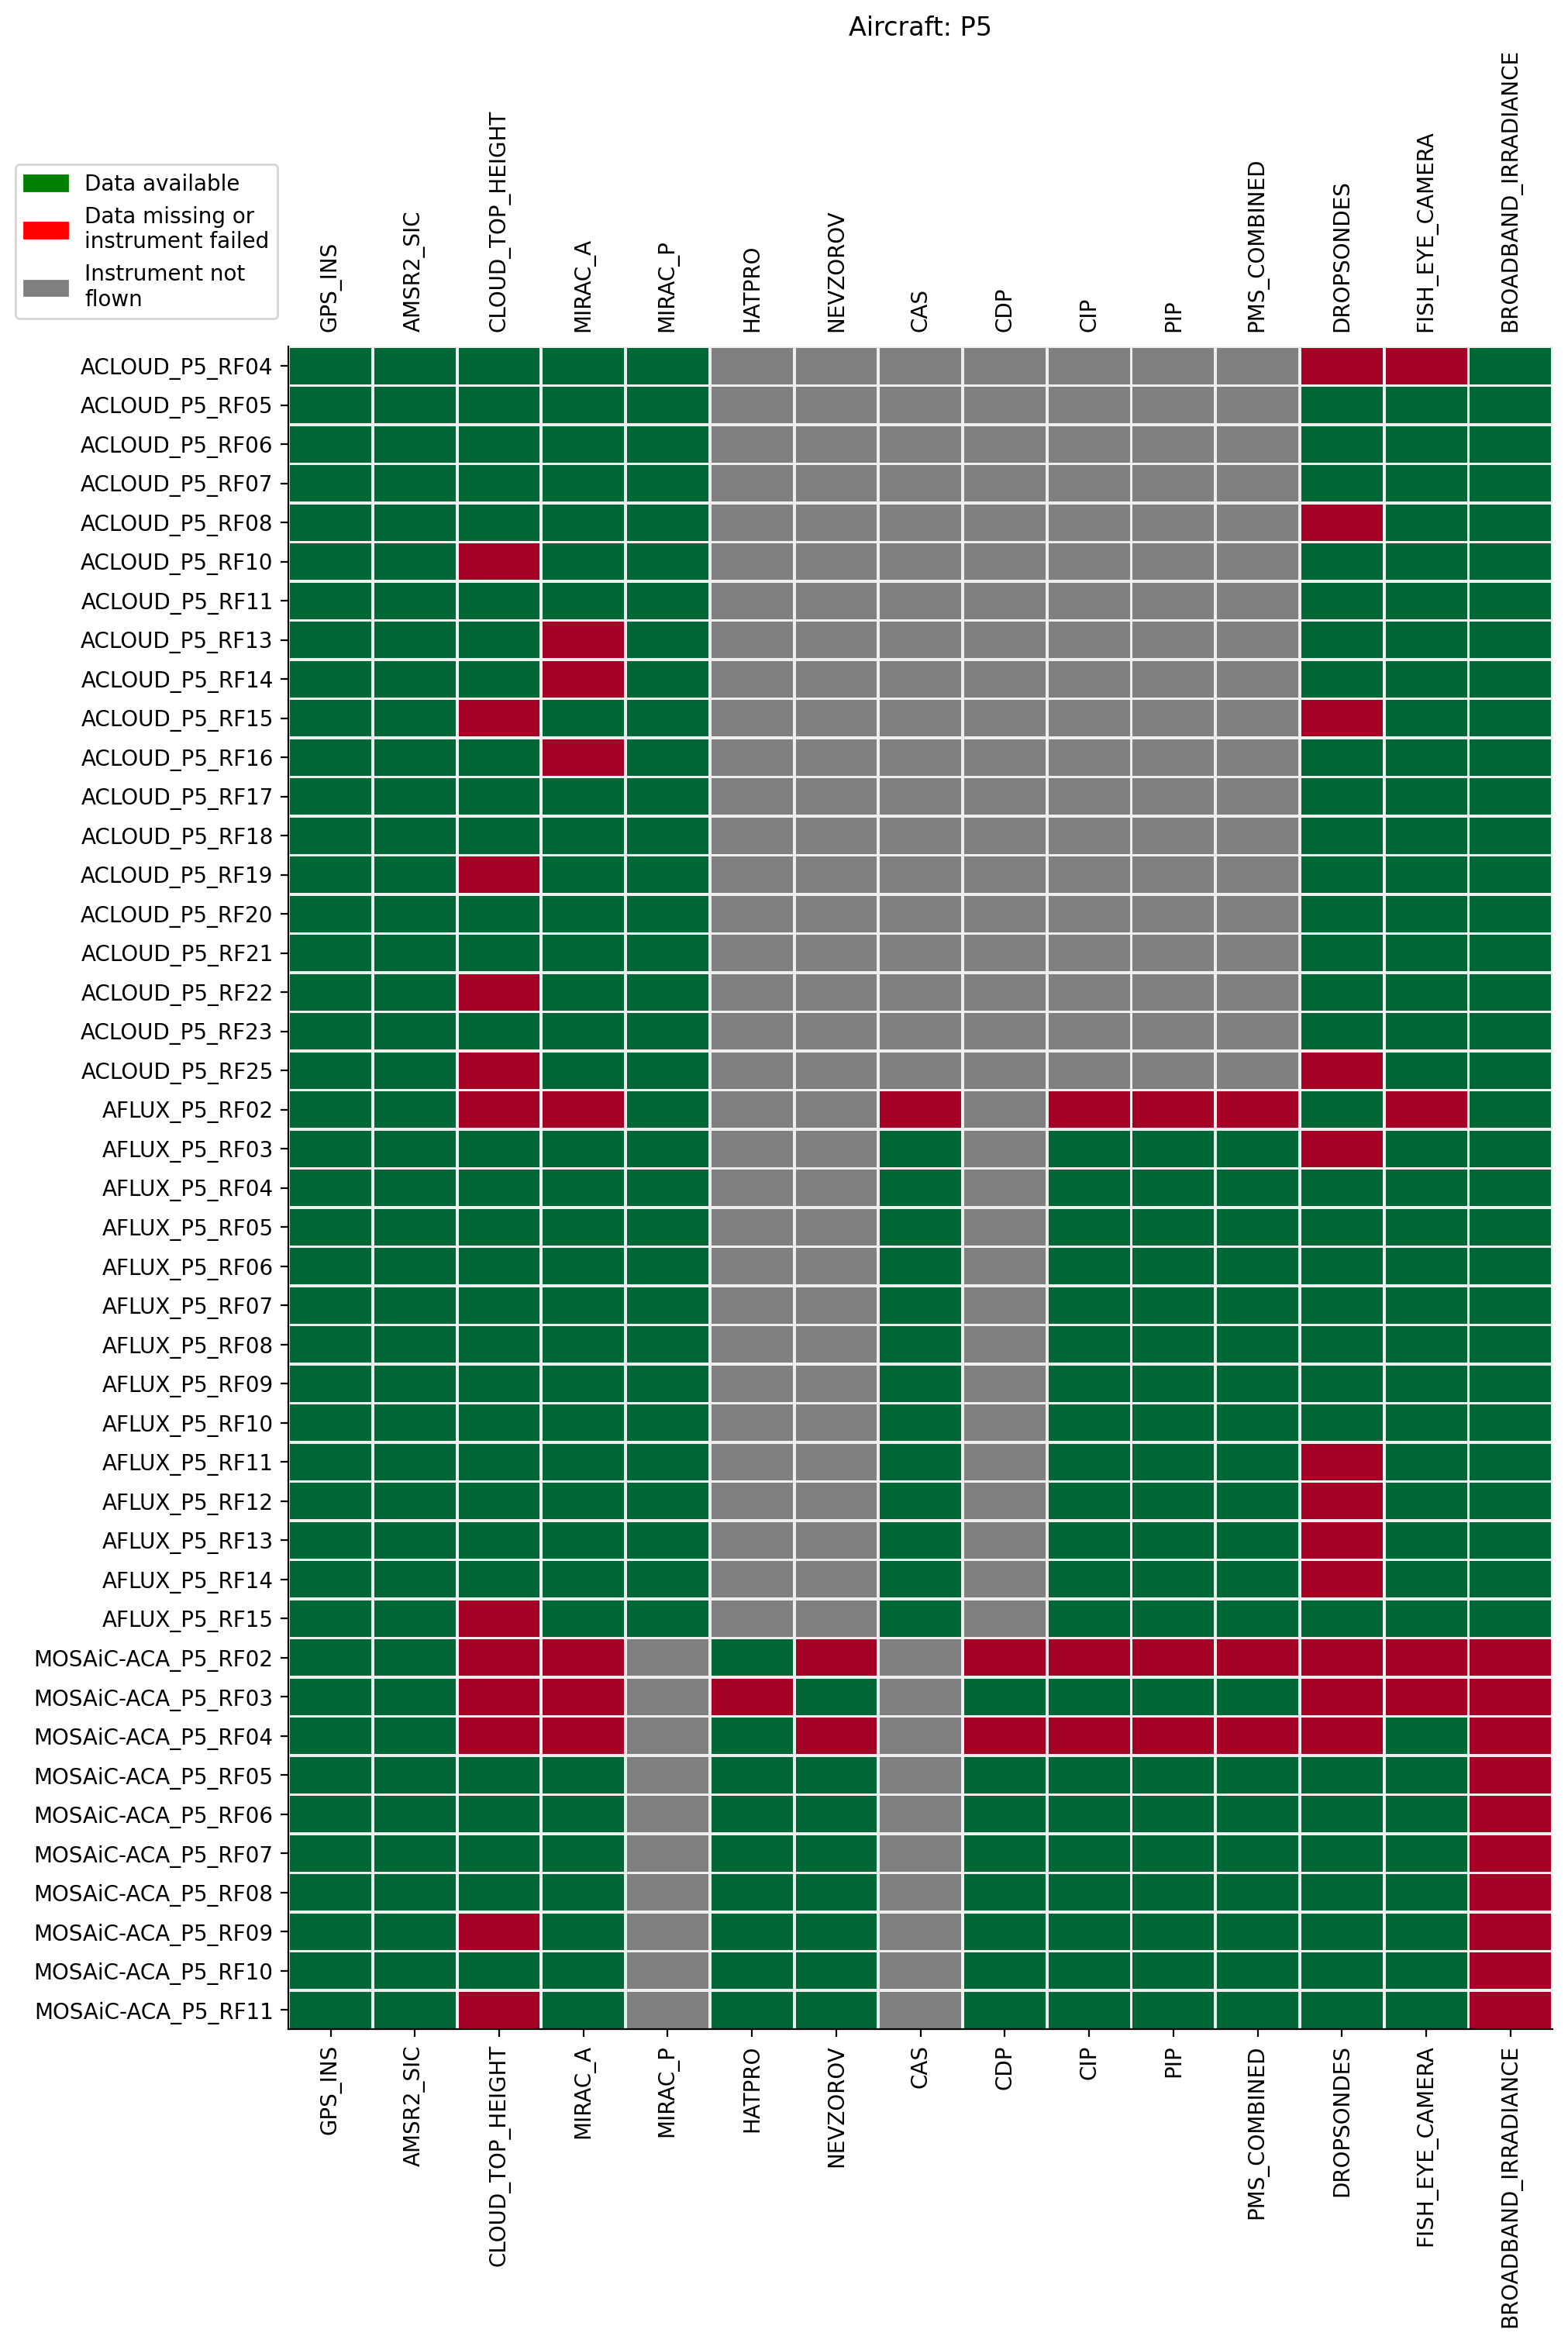

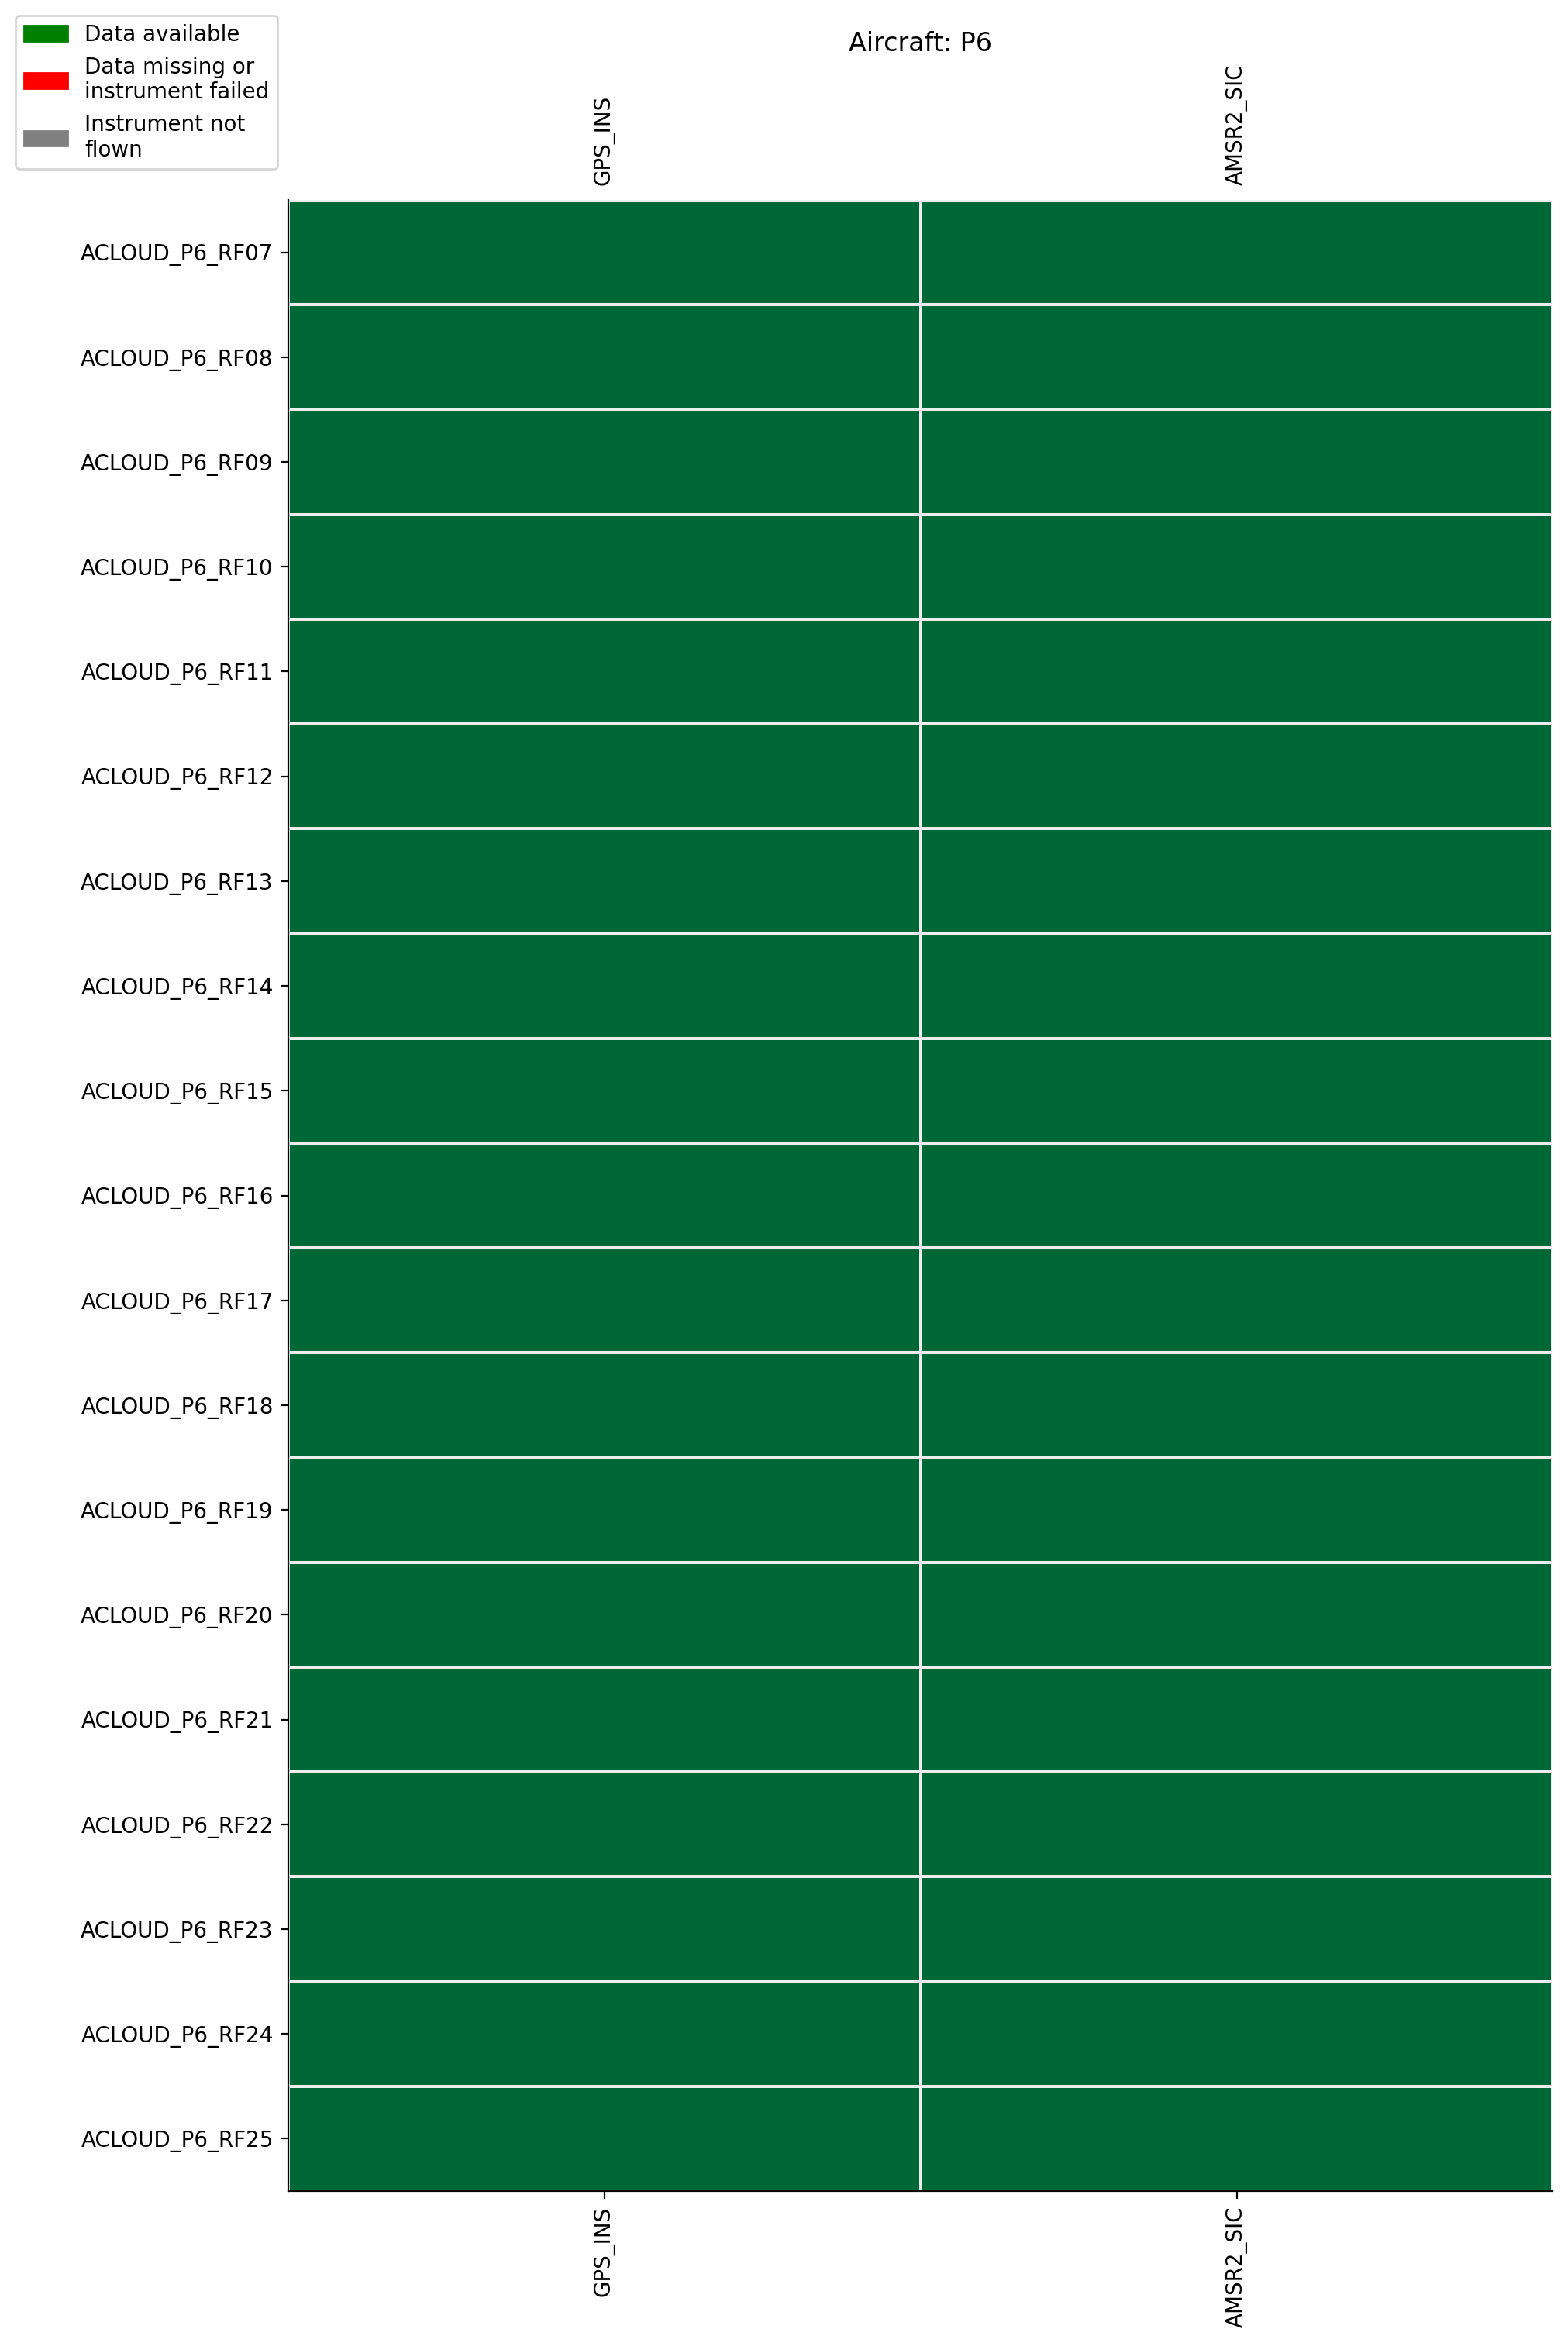

In [6]:
%matplotlib inline
import ac3airborne
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
plt.style.use("mplstyle/book")

# load intake catalog and flight segments
cat = ac3airborne.get_intake_catalog()
meta = ac3airborne.get_flight_segments()


def data_availability(aircraft):
    """
    Plot data availability matrix
    """
    
    # set the index of flights, where a certain instrument
    # was not flown
    instr_dct = {'P5': {}, 'P6': {}}
    instr_dct['P5'] = {
        'HATPRO': 
            ['ACLOUD' in x or 'AFLUX' in x for x in list(meta[aircraft])],
        'MIRAC_P': 
            ['MOSAiC-ACA' in x for x in list(meta[aircraft])],
        'NEVZOROV': 
            ['ACLOUD' in x or 'AFLUX' in x for x in list(meta[aircraft])],
        'PMS_COMBINED':
            ['ACLOUD' in x for x in list(meta[aircraft])],
        'CDP': 
            ['ACLOUD' in x or 'AFLUX' in x for x in list(meta[aircraft])],
        'PIP': 
            ['ACLOUD' in x for x in list(meta[aircraft])],
        'CIP': 
            ['ACLOUD' in x for x in list(meta[aircraft])],
        'CAS': 
            ['ACLOUD' in x or 'MOSAiC-ACA' in x for x in list(meta[aircraft])]
        }

    # store data availability in a matrix
    data_availability = np.zeros(shape=(len(list(cat[aircraft])),
                                        len(list(meta[aircraft]))))
    for i, dataset in enumerate(list(cat[aircraft])):
        data_availability[i, :] = np.isin(list(meta[aircraft]), 
                                          list(cat[aircraft][dataset]))

        # replace values, where instrument was not flown
        ix_not_flown = instr_dct[aircraft].get(dataset)
        if ix_not_flown is not None:
            assert data_availability[i, ix_not_flown].sum() == 0
            data_availability[i, ix_not_flown] = np.nan

    # plot data availability
    fig, ax = plt.subplots(1, 1, figsize=(10, 15), dpi=200,
                           constrained_layout=True)

    ax.set_title(f'Aircraft: {aircraft}')
    
    ax.set_facecolor('grey')

    ax.pcolormesh(range(data_availability.shape[0]), 
                  range(data_availability.shape[1]), 
                  data_availability.T, 
                  shading='nearest',
                  vmin=0, 
                  vmax=1, 
                  cmap='RdYlGn', 
                  edgecolors='#eeeeee')

    ax.set_xticks(range(data_availability.shape[0]))
    ax.set_yticks(range(data_availability.shape[1]))

    ax.set_xticklabels(list(list(cat[aircraft])), rotation=90)
    ax.set_yticklabels(list(list(meta[aircraft])))

    ax.tick_params(labeltop=True)
    ax.invert_yaxis()


    available = mpatches.Patch(color='green', label='Data available')
    not_flown = mpatches.Patch(color='red', label='Data missing or\ninstrument failed')
    missing = mpatches.Patch(color='grey', label='Instrument not\nflown')

    ax.legend(handles=[available, not_flown, missing], ncol=1,
              bbox_to_anchor=(0, 1.01), loc='lower right')

    plt.show()


data_availability(aircraft='P5')
data_availability(aircraft='P6')